In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]['all']
        city_wind = city_weather["wind"]['speed']
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lon": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila franca do campo
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | kharp
Processing Record 7 of Set 1 | kachkanar
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | erzin
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | udachnyy
Processing Record 12 of Set 1 | tura
Processing Record 13 of Set 1 | nome
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | lavrentiya
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | emerald
Processing Record 21 of Set 1 | margate
Processing Record 22 of Set 1 | halifax
Process

Processing Record 36 of Set 4 | paris
Processing Record 37 of Set 4 | matara
Processing Record 38 of Set 4 | san rafael
Processing Record 39 of Set 4 | airai
Processing Record 40 of Set 4 | pizarro
Processing Record 41 of Set 4 | ishigaki
Processing Record 42 of Set 4 | kaitangata
Processing Record 43 of Set 4 | port alfred
Processing Record 44 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 4 | hamilton
Processing Record 46 of Set 4 | lata
Processing Record 47 of Set 4 | nizhneangarsk
Processing Record 48 of Set 4 | danane
Processing Record 49 of Set 4 | adrar
Processing Record 0 of Set 5 | saint-philippe
Processing Record 1 of Set 5 | mersing
Processing Record 2 of Set 5 | darab
Processing Record 3 of Set 5 | esso
Processing Record 4 of Set 5 | ambikapur
Processing Record 5 of Set 5 | bossangoa
Processing Record 6 of Set 5 | dhidhdhoo
Processing Record 7 of Set 5 | zhigansk
Processing Record 8 of Set 5 | burnie
Processing Record 9 of Set 5 | coquimbo
P

Processing Record 24 of Set 8 | vila velha
Processing Record 25 of Set 8 | tahoua
Processing Record 26 of Set 8 | dandong
Processing Record 27 of Set 8 | qaqortoq
Processing Record 28 of Set 8 | praia
Processing Record 29 of Set 8 | tracy
Processing Record 30 of Set 8 | manassas
Processing Record 31 of Set 8 | havoysund
Processing Record 32 of Set 8 | khorramabad
Processing Record 33 of Set 8 | vangaindrano
Processing Record 34 of Set 8 | lahan
Processing Record 35 of Set 8 | vila
Processing Record 36 of Set 8 | klamath falls
Processing Record 37 of Set 8 | micheweni
Processing Record 38 of Set 8 | ulaangom
Processing Record 39 of Set 8 | allanmyo
City not found. Skipping...
Processing Record 40 of Set 8 | muros
Processing Record 41 of Set 8 | diego de almagro
Processing Record 42 of Set 8 | waw
Processing Record 43 of Set 8 | kurtamysh
Processing Record 44 of Set 8 | myatlevo
Processing Record 45 of Set 8 | bellevue
Processing Record 46 of Set 8 | grindavik
Processing Record 47 of Set

Processing Record 14 of Set 12 | bognor regis
Processing Record 15 of Set 12 | nisia floresta
Processing Record 16 of Set 12 | sindor
Processing Record 17 of Set 12 | abha
Processing Record 18 of Set 12 | newtownards
Processing Record 19 of Set 12 | moskovskiy
Processing Record 20 of Set 12 | bombay
Processing Record 21 of Set 12 | masuguru
Processing Record 22 of Set 12 | gornopravdinsk
Processing Record 23 of Set 12 | sorland
Processing Record 24 of Set 12 | mae sai
Processing Record 25 of Set 12 | aripuana
Processing Record 26 of Set 12 | kavaratti
Processing Record 27 of Set 12 | castelo do piaui
Processing Record 28 of Set 12 | rangapara
Processing Record 29 of Set 12 | honningsvag
Processing Record 30 of Set 12 | sanjwal
Processing Record 31 of Set 12 | hofn
Processing Record 32 of Set 12 | tikhvin
Processing Record 33 of Set 12 | tazovskiy
Processing Record 34 of Set 12 | monroe
Processing Record 35 of Set 12 | kitimat
Processing Record 36 of Set 12 | andahuaylas
Processing Reco

# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Convert the cities weather data into a Pandas DataFrame
#city_data_df =pd.DataFrame({"City":city, "Lat":city_lat, "Lng": city_lng, "Max Temp":city_max_temp, "Humidity": city_humidity,"Cloudiness": city_clouds, "Wind Speed": city_wind, "Country":city_country, "Date":city_date })
city_data_df=pd.DataFrame(city_data, columns=["City", "Lat", "Lon", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])
# Show Record Count
city_data_df.count()

City          575
Lat           575
Lon           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.7167,-25.4333,72.19,86,18,8.84,PT,1667565513
1,kapaa,22.0752,-159.3190,79.12,84,100,11.50,US,1667565513
2,punta arenas,-53.1500,-70.9167,57.22,71,75,6.91,CL,1667565514
3,ilulissat,69.2167,-51.1000,28.42,69,75,0.00,GL,1667565514
4,ushuaia,-54.8000,-68.3000,47.86,76,75,23.02,AR,1667565515


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila franca do campo,37.7167,-25.4333,72.19,86,18,8.84,PT,1667565513
1,kapaa,22.0752,-159.3190,79.12,84,100,11.50,US,1667565513
2,punta arenas,-53.1500,-70.9167,57.22,71,75,6.91,CL,1667565514
3,ilulissat,69.2167,-51.1000,28.42,69,75,0.00,GL,1667565514
4,ushuaia,-54.8000,-68.3000,47.86,76,75,23.02,AR,1667565515


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

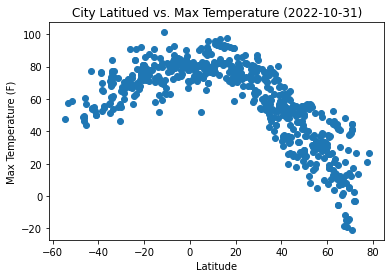

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitued vs. Max Temperature (2022-10-31)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

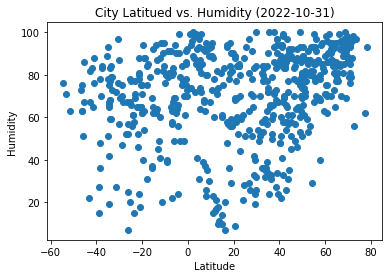

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitued vs. Humidity (2022-10-31)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

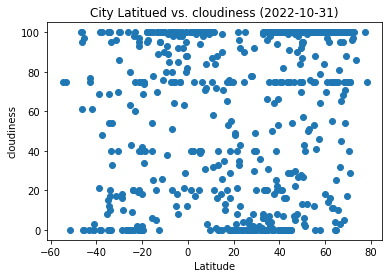

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitued vs. cloudiness (2022-10-31)")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

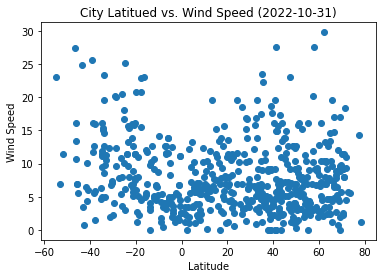

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitued vs. Wind Speed (2022-10-31)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    print(f"The r-squared value is: {rvalue**2}")
    regress_values = x * slope + intercept
    line_eq="y="+str(round(slope,2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x,y)
    plt.plot(x, regress_values,"r-")  
    plt.annotate(line_eq, xy=(50, 50),xycoords='figure pixels',fontsize=15,color="red")
    plt.show()
 


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila franca do campo,37.7167,-25.4333,72.19,86,18,8.84,PT,1667565513
1,kapaa,22.0752,-159.3190,79.12,84,100,11.50,US,1667565513
3,ilulissat,69.2167,-51.1000,28.42,69,75,0.00,GL,1667565514
5,kharp,66.8014,65.8081,10.11,70,45,4.88,RU,1667565515
6,kachkanar,58.7000,59.4948,23.34,95,100,6.82,RU,1667565516


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,punta arenas,-53.1500,-70.9167,57.22,71,75,6.91,CL,1667565514
4,ushuaia,-54.8000,-68.3000,47.86,76,75,23.02,AR,1667565515
9,touros,-5.1989,-35.4608,85.60,62,12,10.07,BR,1667565518
13,east london,-33.0153,27.9116,73.54,73,33,10.49,ZA,1667565520
16,bambous virieux,-20.3428,57.7575,80.85,65,75,11.50,MU,1667565521


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7392659377848191


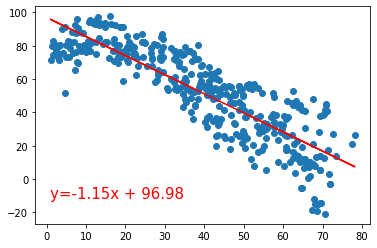

In [18]:
# Linear regression on Northern Hemisphere
regression_plot=linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])


The r-squared value is: 0.42780175054658515


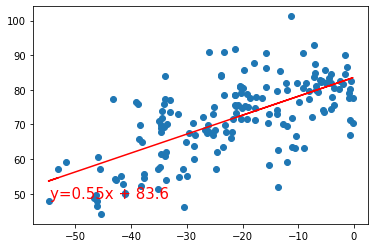

In [19]:
# Linear regression on Southern Hemisphere
regression_plot=linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.09902513524070088


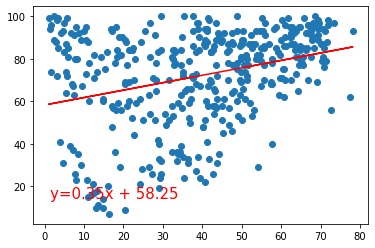

In [20]:
# Northern Hemisphere
regression_plot=linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The r-squared value is: 0.06435294698669486


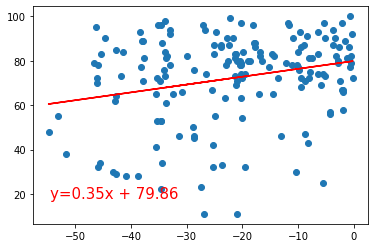

In [72]:
# Southern Hemisphere
regression_plot=linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.05001677202583391


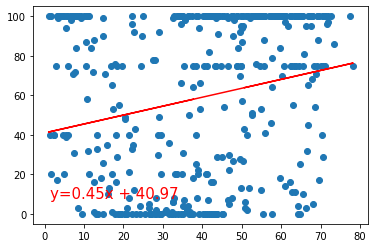

In [21]:
# Northern Hemisphere
regression_plot=linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r-squared value is: 0.050305178669567394


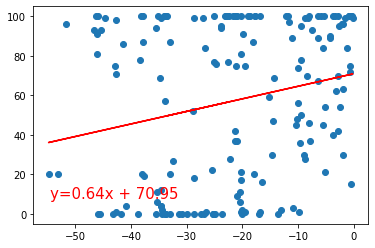

In [74]:
# Southern Hemisphere
regression_plot=linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.007261542754812346


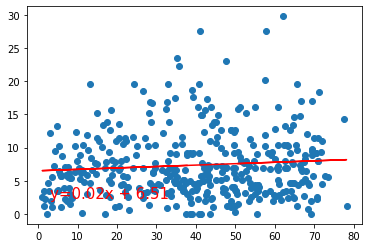

In [22]:
# Northern Hemisphere
regression_plot=linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r-squared value is: 0.1251653461430608


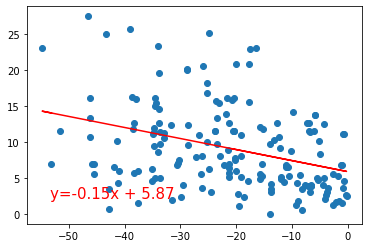

In [23]:
# Southern Hemisphere
regression_plot=linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE